In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('game_data.csv')
df.head(10)

,-88.06688725,287.9,0.2,0
0,-88.066887,287.7,0.3,0.04
1,-88.106887,287.4,0.4,0.00
2,-88.106887,287.0,0.5,0.04
3,-88.146887,286.5,0.6,0.00
4,-88.146887,285.9,0.7,0.04
5,-88.186887,285.2,0.8,0.00
6,-88.186887,284.4,0.9,0.04
7,-88.226887,283.5,1.0,0.00
8,-88.226887,282.5,1.1,0.04
9,-88.266887,281.4,1.2,0.00


In [3]:
df.columns = ["Input_X", "Input_Y", "Velocity_Y", "Velocity_X"]
df

,Input_X,Input_Y,Velocity_Y,Velocity_X
0,-88.066887,287.700000,0.300000,0.040000
1,-88.106887,287.400000,0.400000,0.000000
2,-88.106887,287.000000,0.500000,0.040000
3,-88.146887,286.500000,0.600000,0.000000
4,-88.146887,285.900000,0.700000,0.040000
...,...,...,...,...
114357,37.359846,87.610401,5.072313,-0.021098
114358,37.380944,82.538089,5.172313,0.018902
114359,37.362041,77.365776,5.272313,-0.021098
114360,37.383139,72.093463,5.372313,0.018902


In [4]:
df = df[['Input_X', 'Input_Y', 'Velocity_X', 'Velocity_Y']]
df

,Input_X,Input_Y,Velocity_X,Velocity_Y
0,-88.066887,287.700000,0.040000,0.300000
1,-88.106887,287.400000,0.000000,0.400000
2,-88.106887,287.000000,0.040000,0.500000
3,-88.146887,286.500000,0.000000,0.600000
4,-88.146887,285.900000,0.040000,0.700000
...,...,...,...,...
114357,37.359846,87.610401,-0.021098,5.072313
114358,37.380944,82.538089,0.018902,5.172313
114359,37.362041,77.365776,-0.021098,5.272313
114360,37.383139,72.093463,0.018902,5.372313


In [5]:
x1_min = min(df['Input_X'])
x1_max = max(df['Input_X'])
x2_min = min(df['Input_Y'])
x2_max = max(df['Input_Y'])
y1_min = min(df['Velocity_X'])
y1_max = max(df['Velocity_X'])
y2_min = min(df['Velocity_Y'])
y2_max = max(df['Velocity_Y'])

my_dict = {'x1_min' : x1_min, 'x1_max' : x1_max, 'x2_min' : x2_min, 'x2_max' : x2_max, 'y1_min' : y1_min, 'y1_max' : y1_max,
           'y2_min' : y2_min, 'y2_max' : y2_max}

min_max = pd.DataFrame(my_dict, index=[0])
min_max.to_csv('min_max.csv')
# print(x1_min)
# print(x1_max)
# print(x2_min)
# print(x2_max)
# print(y1_min)
# print(y1_max)
# print(y2_min)
# print(y2_max)

In [6]:
# Scaling the data
df.iloc[:,:] = df.iloc[:,:].apply(lambda x: (x-x.min())/ (x.max()-x.min()), axis=0)

## Check for duplicates and null values

In [7]:
df.duplicated().sum()

0

In [8]:
df.isnull().sum()

Input_X       0
Input_Y       0
Velocity_X    0
Velocity_Y    0
dtype: int64

## Split data to train, validation and test

In [9]:
#Creating train dataset from 70% of the total data
train = df.sample(frac = 0.7)
train.sort_index(inplace = True)
len(train)

80053

In [10]:
#creating 30% val_test data by droping training indices from the datase
val_test = df.drop(train.index)
len(val_test)

34309

In [11]:
#creating 50% test set and 50% validation set from val_test dataset
val = val_test.sample(frac = 0.5)
val.sort_index(inplace = True)

test = val_test.drop(val.index)

print(len(train))
print(len(val))
print(len(test))

80053
17154
17155


In [12]:
# Creating array from training, testing and validation sets
X_train = train[['Input_X', 'Input_Y']].values
Y_train = train[['Velocity_X', 'Velocity_Y']].values

X_val = val[['Input_X', 'Input_Y']].values
Y_val = val[['Velocity_X', 'Velocity_Y']].values

X_test = test[['Input_X', 'Input_Y']].values
Y_test = test[['Velocity_X', 'Velocity_Y']].values

In [13]:
print('Training Data Shape   : ', X_train.shape)
print('Training Labels Shape : ', Y_train.shape)

print('Validation Data Shape    : ', X_val.shape)
print('Validation Labels Shape  : ', Y_val.shape)

print('Testing Data Shape   : ', X_test.shape)
print('Testing Labels Shape : ', Y_test.shape)

Training Data Shape   :  (80053, 2)
Training Labels Shape :  (80053, 2)
Validation Data Shape    :  (17154, 2)
Validation Labels Shape  :  (17154, 2)
Testing Data Shape   :  (17155, 2)
Testing Labels Shape :  (17155, 2)


### Building Neural Network Model

In [14]:
class Spaceship_lander:
    
    def __init__(self, train_feature, train_label, val_feature, val_label,
                 learning_rate, momentum_rate, hidden_neurons, patience):
        self.train_feature = train_feature
        self.train_label = train_label
        self.val_feature = val_feature
        self.val_label = val_label
        self.patience = patience
        self.learning_rate = learning_rate
        self.momentum_rate = momentum_rate
        self.input_neurons = len(train_feature[0])
        self.hidden_neurons = hidden_neurons
        self.output_neurons = len(train_label[0])
        self.bias_neuron = 1
        self.lamb = 0.8
        self.bias = np.array([1])
        self.w1 = np.random.random((self.input_neurons + self.bias_neuron, self.hidden_neurons))
        self.w2 = np.random.random((self.hidden_neurons + self.bias_neuron, self.output_neurons))
        self.last_w1 = np.zeros([self.input_neurons + self.bias_neuron, self.hidden_neurons])
        self.last_w2 = np.zeros([self.hidden_neurons + self.bias_neuron, self.output_neurons])
        
        self.training_rmse = []
        self.validation_rmse = []
        self.training_iteration = []
        
    def sigmoid_activation(self, value):
        for i in range(len(value)):
            value[i] = 1 / (1 + math.exp(-self.lamb*value[i]))
        return value
    
    def random_index(self, data):
        random_index_list = np.array([])
        for ii in range(len(data)):
            random_index = np.random.randint(len(data))
            random_index_list = np.append(random_index_list, random_index)
            random_index_list = random_index_list.astype(int)
        return random_index_list
    
    def rmse(self, err):
        e1 = err[0]
        e2 = err[1]
        square_errors1 = []
        square_errors2 = []
        for p in range(len(e1)):
            squares1 = (e1[p])**2
            square_errors1.append(squares1)
                
        for q in range(len(e2)):
            squares2 = (e2[q])**2
            square_errors2.append(squares2)
                
        rmse_y1 = (sum(square_errors1)/len(square_errors1))**(1/2)
        rmse_y2 = (sum(square_errors2)/len(square_errors2))**(1/2)
        avg_rmse = (rmse_y1+rmse_y2)/2
            
        return avg_rmse
    
    def training(self, train_feature, train_label):
        y = []
        y1_error = []
        y2_error = []
        actual_y1 = []
        actual_y2 = []
        predicted_y1 = []
        predicted_y2 = []
        
        random_index = self.random_index(self.train_feature)
        
        for i in range(len(self.train_feature)):
            
            ele = random_index[i]
            
            h1_input = np.append(self.train_feature[ele], self.bias)
            #print('input to hidden layer: \n', h1_input)
            h1_output = np.matmul(h1_input, self.w1)
            #print('output from hidden layer: \n', h1_output)
            
            h1_output = self.sigmoid_activation(h1_output)
            
            h1_output = np.append(h1_output, self.bias)
            #print('sigmoid output from hidden layer: \n', h1_output)
            
            final_output = np.matmul(h1_output, self.w2)
            #print('output from final layer: \n', final_output)
            
            final_output = self.sigmoid_activation(final_output)
            
            y.append(final_output)
            predicted_y1.append(final_output[0])
            predicted_y2.append(final_output[1])
            #print('sigmoid output from final layer: \n', final_output)
            
            e = (self.train_label[ele]-final_output)
            #print('error after final layer: \n', e)
            
            y1_error.append(e[0])
            y2_error.append(e[1])
            actual_y1.append(train_label[ele][0])
            actual_y2.append(train_label[ele][1])
            
            g_output = []
            for l in range(self.output_neurons):
                g_output_ele = self.lamb * final_output[l] * (1-final_output[l]) * e[l]
                g_output.append(g_output_ele)
            g_output = np.array(g_output)
            #print('gradients at final layer: \n', g_output)
        
            g_hidden = []
            for m in range(len(h1_output)-1):
                g_hidden_ele = self.lamb * h1_output[m] * (1-h1_output[m]) * ((g_output[0] * self.w2[m][0])+(g_output[1] * self.w2[m][1]))
                g_hidden.append(g_hidden_ele)
            g_hidden = np.array(g_hidden)
            #print('gradients at hidden layer: \n', g_hidden)
        
            delta_w2 = []
            for n in range(len(self.w2)):
                o = []
                for p in range(len(self.w2[n])):
                    delta_w2_ele = self.learning_rate * g_output[p] * h1_output[n]
                    o.append(delta_w2_ele)
                delta_w2.append(o)
            delta_w2 = np.array(delta_w2)
            delta_w2 = delta_w2 + (self.momentum_rate * self.last_w2)
            #print('delta_w2: \n', delta_w2)
            
            for q in range(len(self.w2)):
                self.w2[q] = self.w2[q] + delta_w2[q]       
            #print('updated weights for final layer: \n', w2)
        
            for qq in range(len(self.last_w2)):
                self.last_w2[qq] = delta_w2[qq] 
        
            delta_w1 = []
            for r in range(len(self.w1)):
                t = []
                for s in range(len(self.w1[r])):
                    delta_w1_ele = self.learning_rate * g_hidden[s] * h1_input[r]
                    t.append(delta_w1_ele)
                delta_w1.append(t)
            delta_w1 = np.array(delta_w1)
            delta_w1 = delta_w1 + (self.momentum_rate * self.last_w1)
            #print('delta_w1: \n', delta_w1)
                
            #updating weights for hidden layer
            for u in range(len(self.w1)):
                self.w1[u] = self.w1[u] + delta_w1[u]
            #print('updated weights for hidden layer: \n', w1)
        
            for uu in range(len(self.last_w1)):
                self.last_w1[uu] = delta_w1[uu]

        return y1_error, y2_error
            
    def validation(self, val_feature, val_label):
        y = []
        y1_error = []
        y2_error = []
        actual_y1 = []
        actual_y2 = []
        predicted_y1 = []
        predicted_y2 = []
        
        for i in range(len(self.val_feature)):
            ele = i
            
            h1_input = np.append(self.val_feature[ele], self.bias)
            #print('input to hidden layer: \n', h1_input)
            h1_output = np.matmul(h1_input, self.w1)
            #print('output from hidden layer: \n', h1_output)
            
            h1_output = self.sigmoid_activation(h1_output)
            
            h1_output = np.append(h1_output, self.bias)
            #print('sigmoid output from hidden layer: \n', h1_output)
            
            final_output = np.matmul(h1_output, self.w2)
            #print('output from final layer: \n', final_output)
            
            final_output = self.sigmoid_activation(final_output)
            
            y.append(final_output)
            predicted_y1.append(final_output[0])
            predicted_y2.append(final_output[1])
            #print('sigmoid output from final layer: \n', final_output)
            
            e = (self.val_label[ele]-final_output)
            #print('error after final layer: \n', e)
            
            y1_error.append(e[0])
            y2_error.append(e[1])
            actual_y1.append(val_label[ele][0])
            actual_y2.append(val_label[ele][1])
            
        return y1_error, y2_error
    
    def epoch(self, epoch_no):
        for iteration in range(epoch_no):
            print('Epoch: ', iteration + 1)
            self.training_iteration.append(iteration+1)
            train_error = self.training(self.train_feature, self.train_label)
            train_rmse = self.rmse(train_error)
            self.training_rmse.append(train_rmse)
            #print('Training RMSE: ', train_rmse)
            
            val_error = self.validation(self.val_feature, self.val_label)
            val_rmse = self.rmse(val_error)
            self.validation_rmse.append(val_rmse)
            print('Training RMSE: ' + str(train_rmse) + '      Validation RMSE: ' + str(val_rmse))
            
            count = 0
            ind = -1
            if len(self.validation_rmse)>self.patience:
                for i in range(self.patience):
                    if self.validation_rmse[ind] > min(self.validation_rmse):
                        count = count + 1
                        ind = ind -1
                if count >= self.patience:
                    print('Early stopping at Epoch: ', iteration+1)
                    break

    def predict(self, a, b):
        pred_error = self.validation(a, b)
        pred_RMSE = self.rmse(pred_error)
        print('Prediction RMSE: ', pred_RMSE)

In [15]:
a = Spaceship_lander(X_train, Y_train, X_val, Y_val, learning_rate = 0.01, momentum_rate = 0.8, hidden_neurons = 4,
                     patience = 5)

In [16]:
a.epoch(500)

Epoch:  1
Training RMSE: 0.10892076016527663      Validation RMSE: 0.10677694871984278
Epoch:  2
Training RMSE: 0.10597937708192723      Validation RMSE: 0.10516173620917987
Epoch:  3
Training RMSE: 0.10383912016037      Validation RMSE: 0.10187991418597353
Epoch:  4
Training RMSE: 0.10128482280798927      Validation RMSE: 0.09912857657750783
Epoch:  5
Training RMSE: 0.10003490288831157      Validation RMSE: 0.09837685877705951
Epoch:  6
Training RMSE: 0.09938277804485246      Validation RMSE: 0.09821049874509793
Epoch:  7
Training RMSE: 0.09875871823730539      Validation RMSE: 0.09817716714848299
Epoch:  8
Training RMSE: 0.09919335123370066      Validation RMSE: 0.0982328921945891
Epoch:  9
Training RMSE: 0.0988236778186353      Validation RMSE: 0.09863203167347523
Epoch:  10
Training RMSE: 0.09848310946588862      Validation RMSE: 0.09807408232852624
Epoch:  11
Training RMSE: 0.09885865034332904      Validation RMSE: 0.09832230872489066
Epoch:  12
Training RMSE: 0.0990984835284092  

Training RMSE: 0.09655883051851852      Validation RMSE: 0.09551976740545026
Epoch:  96
Training RMSE: 0.09645023233963632      Validation RMSE: 0.09543226878996891
Epoch:  97
Training RMSE: 0.0962533464725353      Validation RMSE: 0.095661864158002
Epoch:  98
Training RMSE: 0.09661136443354361      Validation RMSE: 0.09535368006640854
Epoch:  99
Training RMSE: 0.09613400465321359      Validation RMSE: 0.09525269874007158
Epoch:  100
Training RMSE: 0.09665693005462572      Validation RMSE: 0.09522696093127961
Epoch:  101
Training RMSE: 0.09622085560806981      Validation RMSE: 0.09543404882685319
Epoch:  102
Training RMSE: 0.09600021178643356      Validation RMSE: 0.09521315305933396
Epoch:  103
Training RMSE: 0.09593383120445141      Validation RMSE: 0.09526150982018403
Epoch:  104
Training RMSE: 0.09588292727898685      Validation RMSE: 0.09503556447431102
Epoch:  105
Training RMSE: 0.0959276224723011      Validation RMSE: 0.09512154183109689
Epoch:  106
Training RMSE: 0.096014785221

In [17]:
training_loss = a.training_rmse
validation_loss = a.validation_rmse
hidden = a.hidden_neurons
learning = a.learning_rate
momentum = a.momentum_rate
lamb = a.lamb

Minimum training rmse: 0.09383098676264562At Epoch: 151
Minimum validation rmse: 0.0931425846656921At Epoch: 155


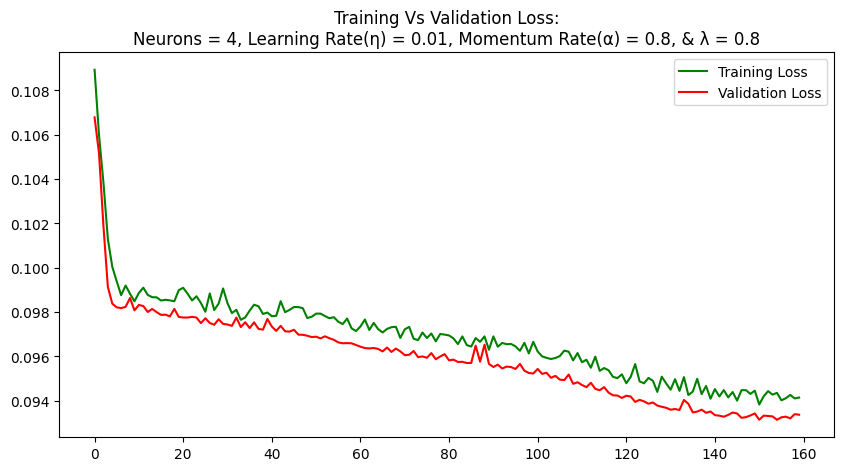

In [18]:
print('Minimum training rmse: ' + str(min(training_loss)) + 'At Epoch: ' +  str(training_loss.index(min(training_loss))+1))
print('Minimum validation rmse: ' + str(min(validation_loss)) + 'At Epoch: ' +  str(validation_loss.index(min(validation_loss))+1))

plt.figure(figsize = (10,5), dpi = 100)
plt.plot(training_loss, color = 'green', label = 'Training Loss')
plt.plot(validation_loss, color = 'red', label = 'Validation Loss')
plt.title('Training Vs Validation Loss:\n' +  'Neurons = ' + str(hidden) + ', Learning Rate(η) = ' + str(learning) +
          ', Momentum Rate(α) = ' + str(momentum) + ', & λ = ' + str(lamb))
plt.legend()

In [19]:
a.predict(X_test, Y_test)

Prediction RMSE:  0.09947974944030426


In [211]:
# print("Number of neurons in First Layer: ", a.input_neurons)
# print("Weights for hidden layer: \n", a.w1)
# print("Number of hidden neurons: ", a.hidden_neurons)
# print("Weights for output layer: \n", a.w2)

In [20]:
np.savetxt("w1.csv", a.w1, delimiter=",")
np.savetxt("w2.csv", a.w2, delimiter=",")

### GRID Search

In [37]:
X_train = X_train[:10000]
Y_train = Y_train[:10000]
X_val = X_val[:10000]
Y_val = Y_val[:10000]

learning_rate = [0.001, 0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.025, 0.05,0.075, 0.1]
momentum_rate = [0.5, 0.6, 0.7, 0.8, 0.85, 0.9, 0.95]
n_neurons = range(4,20)
n_epoch = 10
grid_info = []

for neurons in n_neurons:
    for learning in learning_rate:
        for momentum in momentum_rate:
            print('Looking at: neurons = ' + str(neurons) + ', learning = ' + str(learning) + ', momentum = ' + str(momentum))
            b = Spaceship_lander(X_train, Y_train, X_test, Y_test, learning_rate = learning,
                                 momentum_rate = momentum, hidden_neurons = neurons, patience = 5)
            b.epoch(n_epoch)
            info = [neurons, learning, momentum, min(b.validation_rmse), (b.validation_rmse.index(min(b.validation_rmse))+1)]
            grid_info.append(info)

Looking at: neurons = 4, learning = 0.001, momentum = 0.5
Looking at: neurons = 4, learning = 0.001, momentum = 0.6
Looking at: neurons = 4, learning = 0.001, momentum = 0.7
Looking at: neurons = 4, learning = 0.001, momentum = 0.8
Looking at: neurons = 4, learning = 0.001, momentum = 0.85
Looking at: neurons = 4, learning = 0.001, momentum = 0.9
Looking at: neurons = 4, learning = 0.001, momentum = 0.95
Looking at: neurons = 4, learning = 0.005, momentum = 0.5
Looking at: neurons = 4, learning = 0.005, momentum = 0.6
Looking at: neurons = 4, learning = 0.005, momentum = 0.7
Looking at: neurons = 4, learning = 0.005, momentum = 0.8
Early stopping at Epoch:  8
Looking at: neurons = 4, learning = 0.005, momentum = 0.85
Early stopping at Epoch:  8
Looking at: neurons = 4, learning = 0.005, momentum = 0.9
Early stopping at Epoch:  9
Looking at: neurons = 4, learning = 0.005, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 4, learning = 0.0075, momentum = 0.5
Looking at: 

Early stopping at Epoch:  10
Looking at: neurons = 5, learning = 0.0125, momentum = 0.6
Looking at: neurons = 5, learning = 0.0125, momentum = 0.7
Early stopping at Epoch:  7
Looking at: neurons = 5, learning = 0.0125, momentum = 0.8
Early stopping at Epoch:  8
Looking at: neurons = 5, learning = 0.0125, momentum = 0.85
Early stopping at Epoch:  7
Looking at: neurons = 5, learning = 0.0125, momentum = 0.9
Looking at: neurons = 5, learning = 0.0125, momentum = 0.95
Looking at: neurons = 5, learning = 0.015, momentum = 0.5
Early stopping at Epoch:  8
Looking at: neurons = 5, learning = 0.015, momentum = 0.6
Early stopping at Epoch:  8
Looking at: neurons = 5, learning = 0.015, momentum = 0.7
Early stopping at Epoch:  9
Looking at: neurons = 5, learning = 0.015, momentum = 0.8
Looking at: neurons = 5, learning = 0.015, momentum = 0.85
Looking at: neurons = 5, learning = 0.015, momentum = 0.9
Looking at: neurons = 5, learning = 0.015, momentum = 0.95
Looking at: neurons = 5, learning = 0.0

Early stopping at Epoch:  7
Looking at: neurons = 6, learning = 0.025, momentum = 0.85
Early stopping at Epoch:  9
Looking at: neurons = 6, learning = 0.025, momentum = 0.9
Looking at: neurons = 6, learning = 0.025, momentum = 0.95
Early stopping at Epoch:  8
Looking at: neurons = 6, learning = 0.05, momentum = 0.5
Early stopping at Epoch:  8
Looking at: neurons = 6, learning = 0.05, momentum = 0.6
Early stopping at Epoch:  7
Looking at: neurons = 6, learning = 0.05, momentum = 0.7
Early stopping at Epoch:  9
Looking at: neurons = 6, learning = 0.05, momentum = 0.8
Looking at: neurons = 6, learning = 0.05, momentum = 0.85
Looking at: neurons = 6, learning = 0.05, momentum = 0.9
Early stopping at Epoch:  8
Looking at: neurons = 6, learning = 0.05, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 6, learning = 0.075, momentum = 0.5
Looking at: neurons = 6, learning = 0.075, momentum = 0.6
Looking at: neurons = 6, learning = 0.075, momentum = 0.7
Looking at: neurons = 6,

Early stopping at Epoch:  8
Looking at: neurons = 8, learning = 0.005, momentum = 0.85
Looking at: neurons = 8, learning = 0.005, momentum = 0.9
Early stopping at Epoch:  9
Looking at: neurons = 8, learning = 0.005, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 8, learning = 0.0075, momentum = 0.5
Looking at: neurons = 8, learning = 0.0075, momentum = 0.6
Early stopping at Epoch:  9
Looking at: neurons = 8, learning = 0.0075, momentum = 0.7
Looking at: neurons = 8, learning = 0.0075, momentum = 0.8
Looking at: neurons = 8, learning = 0.0075, momentum = 0.85
Looking at: neurons = 8, learning = 0.0075, momentum = 0.9
Looking at: neurons = 8, learning = 0.0075, momentum = 0.95
Looking at: neurons = 8, learning = 0.01, momentum = 0.5
Looking at: neurons = 8, learning = 0.01, momentum = 0.6
Early stopping at Epoch:  8
Looking at: neurons = 8, learning = 0.01, momentum = 0.7
Looking at: neurons = 8, learning = 0.01, momentum = 0.8
Early stopping at Epoch:  8
Looking at: 

Looking at: neurons = 9, learning = 0.0175, momentum = 0.7
Early stopping at Epoch:  8
Looking at: neurons = 9, learning = 0.0175, momentum = 0.8
Early stopping at Epoch:  8
Looking at: neurons = 9, learning = 0.0175, momentum = 0.85
Early stopping at Epoch:  6
Looking at: neurons = 9, learning = 0.0175, momentum = 0.9
Looking at: neurons = 9, learning = 0.0175, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 9, learning = 0.02, momentum = 0.5
Early stopping at Epoch:  8
Looking at: neurons = 9, learning = 0.02, momentum = 0.6
Looking at: neurons = 9, learning = 0.02, momentum = 0.7
Early stopping at Epoch:  7
Looking at: neurons = 9, learning = 0.02, momentum = 0.8
Looking at: neurons = 9, learning = 0.02, momentum = 0.85
Looking at: neurons = 9, learning = 0.02, momentum = 0.9
Early stopping at Epoch:  10
Looking at: neurons = 9, learning = 0.02, momentum = 0.95
Early stopping at Epoch:  6
Looking at: neurons = 9, learning = 0.025, momentum = 0.5
Looking at: neuron

Looking at: neurons = 10, learning = 0.075, momentum = 0.8
Early stopping at Epoch:  8
Looking at: neurons = 10, learning = 0.075, momentum = 0.85
Looking at: neurons = 10, learning = 0.075, momentum = 0.9
Early stopping at Epoch:  6
Looking at: neurons = 10, learning = 0.075, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 10, learning = 0.1, momentum = 0.5
Looking at: neurons = 10, learning = 0.1, momentum = 0.6
Early stopping at Epoch:  8
Looking at: neurons = 10, learning = 0.1, momentum = 0.7
Looking at: neurons = 10, learning = 0.1, momentum = 0.8
Looking at: neurons = 10, learning = 0.1, momentum = 0.85
Looking at: neurons = 10, learning = 0.1, momentum = 0.9
Early stopping at Epoch:  6
Looking at: neurons = 10, learning = 0.1, momentum = 0.95
Looking at: neurons = 11, learning = 0.001, momentum = 0.5
Looking at: neurons = 11, learning = 0.001, momentum = 0.6
Looking at: neurons = 11, learning = 0.001, momentum = 0.7
Looking at: neurons = 11, learning = 0.001,

Early stopping at Epoch:  7
Looking at: neurons = 12, learning = 0.01, momentum = 0.5
Early stopping at Epoch:  10
Looking at: neurons = 12, learning = 0.01, momentum = 0.6
Looking at: neurons = 12, learning = 0.01, momentum = 0.7
Early stopping at Epoch:  8
Looking at: neurons = 12, learning = 0.01, momentum = 0.8
Looking at: neurons = 12, learning = 0.01, momentum = 0.85
Early stopping at Epoch:  10
Looking at: neurons = 12, learning = 0.01, momentum = 0.9
Early stopping at Epoch:  9
Looking at: neurons = 12, learning = 0.01, momentum = 0.95
Early stopping at Epoch:  7
Looking at: neurons = 12, learning = 0.0125, momentum = 0.5
Looking at: neurons = 12, learning = 0.0125, momentum = 0.6
Looking at: neurons = 12, learning = 0.0125, momentum = 0.7
Early stopping at Epoch:  9
Looking at: neurons = 12, learning = 0.0125, momentum = 0.8
Early stopping at Epoch:  9
Looking at: neurons = 12, learning = 0.0125, momentum = 0.85
Looking at: neurons = 12, learning = 0.0125, momentum = 0.9
Early

Early stopping at Epoch:  8
Looking at: neurons = 13, learning = 0.02, momentum = 0.6
Looking at: neurons = 13, learning = 0.02, momentum = 0.7
Looking at: neurons = 13, learning = 0.02, momentum = 0.8
Early stopping at Epoch:  7
Looking at: neurons = 13, learning = 0.02, momentum = 0.85
Looking at: neurons = 13, learning = 0.02, momentum = 0.9
Looking at: neurons = 13, learning = 0.02, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 13, learning = 0.025, momentum = 0.5
Looking at: neurons = 13, learning = 0.025, momentum = 0.6
Looking at: neurons = 13, learning = 0.025, momentum = 0.7
Looking at: neurons = 13, learning = 0.025, momentum = 0.8
Early stopping at Epoch:  9
Looking at: neurons = 13, learning = 0.025, momentum = 0.85
Looking at: neurons = 13, learning = 0.025, momentum = 0.9
Early stopping at Epoch:  6
Looking at: neurons = 13, learning = 0.025, momentum = 0.95
Looking at: neurons = 13, learning = 0.05, momentum = 0.5
Early stopping at Epoch:  9
Looking 

Early stopping at Epoch:  6
Looking at: neurons = 14, learning = 0.1, momentum = 0.9
Looking at: neurons = 14, learning = 0.1, momentum = 0.95
Looking at: neurons = 15, learning = 0.001, momentum = 0.5
Looking at: neurons = 15, learning = 0.001, momentum = 0.6
Looking at: neurons = 15, learning = 0.001, momentum = 0.7
Looking at: neurons = 15, learning = 0.001, momentum = 0.8
Looking at: neurons = 15, learning = 0.001, momentum = 0.85
Looking at: neurons = 15, learning = 0.001, momentum = 0.9
Looking at: neurons = 15, learning = 0.001, momentum = 0.95
Looking at: neurons = 15, learning = 0.005, momentum = 0.5
Looking at: neurons = 15, learning = 0.005, momentum = 0.6
Looking at: neurons = 15, learning = 0.005, momentum = 0.7
Looking at: neurons = 15, learning = 0.005, momentum = 0.8
Looking at: neurons = 15, learning = 0.005, momentum = 0.85
Early stopping at Epoch:  7
Looking at: neurons = 15, learning = 0.005, momentum = 0.9
Looking at: neurons = 15, learning = 0.005, momentum = 0.95

Looking at: neurons = 16, learning = 0.0125, momentum = 0.95
Looking at: neurons = 16, learning = 0.015, momentum = 0.5
Looking at: neurons = 16, learning = 0.015, momentum = 0.6
Looking at: neurons = 16, learning = 0.015, momentum = 0.7
Early stopping at Epoch:  9
Looking at: neurons = 16, learning = 0.015, momentum = 0.8
Looking at: neurons = 16, learning = 0.015, momentum = 0.85
Looking at: neurons = 16, learning = 0.015, momentum = 0.9
Early stopping at Epoch:  7
Looking at: neurons = 16, learning = 0.015, momentum = 0.95
Early stopping at Epoch:  10
Looking at: neurons = 16, learning = 0.0175, momentum = 0.5
Looking at: neurons = 16, learning = 0.0175, momentum = 0.6
Early stopping at Epoch:  7
Looking at: neurons = 16, learning = 0.0175, momentum = 0.7
Early stopping at Epoch:  7
Looking at: neurons = 16, learning = 0.0175, momentum = 0.8
Looking at: neurons = 16, learning = 0.0175, momentum = 0.85
Early stopping at Epoch:  6
Looking at: neurons = 16, learning = 0.0175, momentum 

Looking at: neurons = 17, learning = 0.05, momentum = 0.85
Looking at: neurons = 17, learning = 0.05, momentum = 0.9
Early stopping at Epoch:  8
Looking at: neurons = 17, learning = 0.05, momentum = 0.95
Looking at: neurons = 17, learning = 0.075, momentum = 0.5
Looking at: neurons = 17, learning = 0.075, momentum = 0.6
Early stopping at Epoch:  7
Looking at: neurons = 17, learning = 0.075, momentum = 0.7
Early stopping at Epoch:  10
Looking at: neurons = 17, learning = 0.075, momentum = 0.8
Early stopping at Epoch:  6
Looking at: neurons = 17, learning = 0.075, momentum = 0.85
Looking at: neurons = 17, learning = 0.075, momentum = 0.9
Looking at: neurons = 17, learning = 0.075, momentum = 0.95
Looking at: neurons = 17, learning = 0.1, momentum = 0.5
Early stopping at Epoch:  10
Looking at: neurons = 17, learning = 0.1, momentum = 0.6
Looking at: neurons = 17, learning = 0.1, momentum = 0.7
Looking at: neurons = 17, learning = 0.1, momentum = 0.8
Looking at: neurons = 17, learning = 0.

Early stopping at Epoch:  7
Looking at: neurons = 19, learning = 0.01, momentum = 0.5
Looking at: neurons = 19, learning = 0.01, momentum = 0.6
Looking at: neurons = 19, learning = 0.01, momentum = 0.7
Looking at: neurons = 19, learning = 0.01, momentum = 0.8
Looking at: neurons = 19, learning = 0.01, momentum = 0.85
Looking at: neurons = 19, learning = 0.01, momentum = 0.9
Looking at: neurons = 19, learning = 0.01, momentum = 0.95
Early stopping at Epoch:  8
Looking at: neurons = 19, learning = 0.0125, momentum = 0.5
Looking at: neurons = 19, learning = 0.0125, momentum = 0.6
Looking at: neurons = 19, learning = 0.0125, momentum = 0.7
Looking at: neurons = 19, learning = 0.0125, momentum = 0.8
Looking at: neurons = 19, learning = 0.0125, momentum = 0.85
Early stopping at Epoch:  7
Looking at: neurons = 19, learning = 0.0125, momentum = 0.9
Looking at: neurons = 19, learning = 0.0125, momentum = 0.95
Early stopping at Epoch:  8
Looking at: neurons = 19, learning = 0.015, momentum = 0.5

In [38]:
grid_data = pd.DataFrame(grid_info,columns=['Neurons', 'LearningRate', 'MomentumRate', 'MinRMSE', 'MinRMSE_Epoch'])
grid_data

,Neurons,LearningRate,MomentumRate,MinRMSE,MinRMSE_Epoch
0,4,0.001,0.50,0.159656,10
1,4,0.001,0.60,0.124988,10
2,4,0.001,0.70,0.120309,10
3,4,0.001,0.80,0.113958,10
4,4,0.001,0.85,0.112838,8
...,...,...,...,...,...
1339,19,0.100,0.70,0.108131,9
1340,19,0.100,0.80,0.106715,7
1341,19,0.100,0.85,0.106993,8
1342,19,0.100,0.90,0.106308,7


In [39]:
grid_data.to_csv(r"C:\Users\viren\Essex\Assignments\NN and DL\Individual\new_grid_search.csv")

In [40]:
for i in range(len(grid_data['MinRMSE'])):
    grid_data['MinRMSE'][i] = grid_data['MinRMSE'][i].round(4)

C:\Users\viren\AppData\Local\Temp\ipykernel_11500\1930568055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  grid_data['MinRMSE'][i] = grid_data['MinRMSE'][i].round(4)


In [41]:
least_rmse = min(grid_data['MinRMSE'])

In [42]:
least_rmse

0.1041

In [43]:
params = grid_data[grid_data['MinRMSE'] == least_rmse]
params

,Neurons,LearningRate,MomentumRate,MinRMSE,MinRMSE_Epoch
1000,15,0.075,0.95,0.1041,9


In [44]:
all_params = grid_data[grid_data['MinRMSE']< 0.105]
all_params

,Neurons,LearningRate,MomentumRate,MinRMSE,MinRMSE_Epoch
83,4,0.100,0.95,0.1045,6
412,8,0.075,0.95,0.1046,9
419,8,0.100,0.95,0.1044,8
1000,15,0.075,0.95,0.1041,9
1007,15,0.100,0.95,0.1042,7
